In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('avy_X-y.csv', index_col='Unnamed: 0')

In [2]:
print(df.columns)
print(len(df))
df.count()

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth',
       'pressure', 'above', 'below', 'near', 'storm_slabs', 'wet_slabs',
       'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       'loose_dry'],
      dtype='object')
28084


Temperature_m               28084
Relative_Humidity_m         28084
Temperature_tl              28084
Relative_Humidity_tl        28084
Wind_Speed_Average_tl       28084
Wind_Speed_Maximum_tl       28084
Wind_Direction_(deg.)_tl    28084
precip                      28084
depth                       28084
pressure                    28084
above                        9910
below                        9910
near                         9910
storm_slabs                  9910
wet_slabs                    9910
persistent                   9910
wind_slab                    9910
loose_wet                    9910
glide                        9910
cornices                     9910
loose_dry                    9910
dtype: int64

In [3]:
df.describe()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure,...,below,near,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
count,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,...,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,41.339892,69.057256,40.457058,71.833346,5.993869,13.218412,232.492375,0.010882,35.258536,1016.170093,...,1.932492,2.335116,0.456206,0.031483,0.053280,0.803229,0.519677,0.009687,0.160747,0.036428
std,14.189910,24.539394,14.509618,28.395706,4.859696,8.174939,106.053639,0.034144,42.258102,6.079356,...,0.753626,0.762826,0.498104,0.174629,0.224602,0.397578,0.499638,0.097951,0.367316,0.187362
min,3.229000,4.673000,5.743000,4.038000,-0.036000,0.000000,0.005000,0.000000,0.000000,990.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.880000,48.310000,29.200000,46.875000,1.492750,7.160000,106.300000,0.000000,2.905000,1013.212000,...,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.380000,76.045000,37.900000,82.500000,5.577500,12.960000,286.700000,0.000000,11.260000,1017.278000,...,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,50.840000,91.900000,51.105000,99.400000,9.330000,18.380000,310.500000,0.000000,69.307500,1020.165250,...,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,86.800000,100.000000,85.000000,100.000000,41.900000,72.800000,360.000000,0.740000,143.700000,1034.949000,...,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Prediction 1:
# Storm Slab + Wind Slab

### Storm slab is formed during storms and tends to stabilize very quickly (~3 days after snowfall typical; definitely should resolve within a week)
### Wind slab is harder and 


y = NWAC's forecast of storm slab: 0 or 1 at time T
X = weather conditions, 5 days prior to T 
_possible revision to model: 5 days before and up to 24 hours after (because NWAC may predict storm slab as a hazard when a storm is coming in in the afternoon) - see if this is relevant_

In [4]:
y_all = df[['storm_slabs', 'wind_slab', 'above']]   # all rows including NA for slab danger

In [5]:
# relevant methods for manipluating y

print(y_all.values.shape)
print(y_all.count())
# print(y_all.unique())
print(y_all.iloc[:5].isna())
print('...')
print(y_all.iloc[-5:].isna())
print()
y_ok = y_all[~y_all.storm_slabs.isna()]
print('y_ok.__len__() =', len(y_ok))

(28084, 3)
storm_slabs    9910
wind_slab      9910
above          9910
dtype: int64
                     storm_slabs  wind_slab  above
2014-09-23 09:00:00         True       True   True
2014-09-23 10:00:00         True       True   True
2014-09-23 11:00:00         True       True   True
2014-09-23 12:00:00         True       True   True
2014-09-23 13:00:00         True       True   True
...
                     storm_slabs  wind_slab  above
2017-12-07 20:00:00        False      False  False
2017-12-07 21:00:00        False      False  False
2017-12-07 22:00:00        False      False  False
2017-12-07 23:00:00        False      False  False
2017-12-08 00:00:00        False      False  False

y_ok.__len__() = 9910


In [6]:
df.precip = df.precip.apply(lambda x: x*100)

In [7]:
cols = ['Temperature_m', 'Temperature_tl', 'Wind_Speed_Average_tl', 'Wind_Speed_Maximum_tl', 'precip', 'depth',] 
# cols to use

data = df[cols]
       
       #'above', 'below', 'near', 'storm_slabs', 'wet_slabs', 'Relative_Humidity_m',
       #'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       #'loose_dry', 'Relative_Humidity_tl',  'Wind_Direction_(deg.)_tl',]

In [9]:
print(data.values.shape)
print()
print(data.count())
# ok so: y is 9910 samples; these samples correspond to timestamps from a subset of the data
print()
print(len(data[~y_all.above.isna()]), '= number of data corresponding to y_ok')
print()
print(data.loc[y_ok.index[0]])

(28084, 6)

Temperature_m            28084
Temperature_tl           28084
Wind_Speed_Average_tl    28084
Wind_Speed_Maximum_tl    28084
precip                   28084
depth                    28084
dtype: int64

9910 = number of data corresponding to y_ok

Temperature_m            29.510
Temperature_tl           27.630
Wind_Speed_Average_tl     2.554
Wind_Speed_Maximum_tl    11.110
precip                    0.000
depth                     9.220
Name: 2014-12-20 00:00:00, dtype: float64


In [10]:
# find i | x[i] matches index of y[j]
# only have to run it once!

dicty = {}    # map from .iloc index of y: corresponding .iloc index of data

lower_limit = 0
for i in range(len(y_ok)):
    for j in range(lower_limit, len(data)):
        if data.index[j] == y_ok.index[i]:
            dicty[i] = j
            lower_limit = j
            break

In [11]:
dicty[0]

2103

In [12]:
data.values.shape

(28084, 6)

In [13]:
fl = 12  # fl = forward looking - ie. how far forward
days = 5

X_multiseries = np.empty((len(y_ok) - fl, 24*days, len(data.columns)))   
# 9910 - 30 samples because last day goes into future; days of weather info * 24hours/day  x  columns

for i in range(len(y_ok) - fl):
    X_multiseries[i] = data.values[dicty[i] - 24*(days-1) - fl: dicty[i] + fl]
    
# X is now a dataset with 7 days worth of weather for each y

y = y_ok[:-fl]
X_multiseries.shape

(9898, 120, 6)

In [14]:
# look at some X s

def view_x(i, X=X_multiseries, label=y.values):
    # view i-th sample of multiseries data
    print(' \n\n#####')
    x = X[i]
    for s in range(x.shape[-1]):  # for series index:
        plt.scatter(range(len(x[:, s])), x[:, s])
    plt.show()
    print(label[i])

 

#####


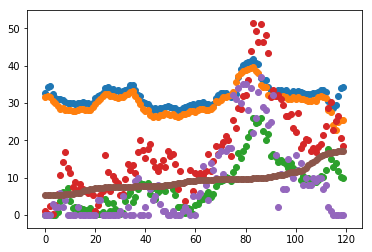

[ 1.  1.  3.]
 

#####


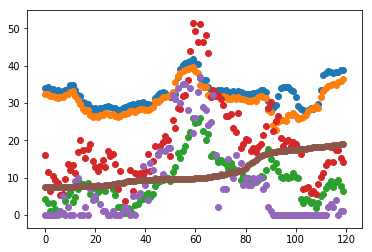

[ 0.  1.  2.]


In [15]:
view_x(48)  # danger of storm slab

view_x(72)  # no danger

In [22]:
split = -2000
X_train = X_multiseries[:split]
y_train = np.sum(y[['storm_slabs', 'wind_slab']][:split].values, axis=1) * y[:split].above.values
y_train[:120]

array([ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.])

In [16]:
from sklearn.ensemble import RandomForestRegressor as RF

# make RF for each time series

multisvc = {}
for i in range(len(data.columns)):
    multisvc[i] = RF(n_estimators=10)

In [23]:
from tqdm import tqdm

# fit each SVC (actually RF) to a series (always predicting y_train)
for s in tqdm(range(X_train.shape[-1])):
    multisvc[s].fit(X_train[:, :, s], y_train)

100%|██████████| 6/6 [00:26<00:00,  4.34s/it]


In [24]:
# generate features for training set to train metaclassifier
X_train_meta = np.empty((X_train.shape[0], X_train.shape[-1]))
for i in tqdm(range(X_train.shape[-1])):
    X_train_meta[:, i] = multisvc[i].predict(X_train[:, :, i])

100%|██████████| 6/6 [00:00<00:00, 53.07it/s]


 

#####


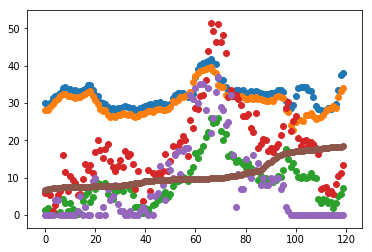

[ 1.  1.  3.]
[ 5.2  5.6  5.6  5.6  6.   6. ]
massive overfitting ?
 

#####


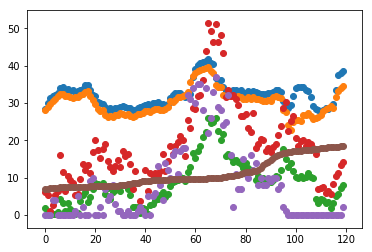

[ 1.  1.  3.]
[ 6.   6.   5.4  6.   6.   6. ]
massive overfitting ?
 

#####


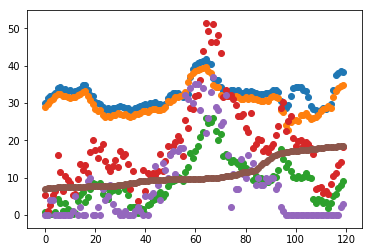

[ 1.  1.  3.]
[ 6.   5.7  5.6  5.   6.   5.6]
massive overfitting ?
 

#####


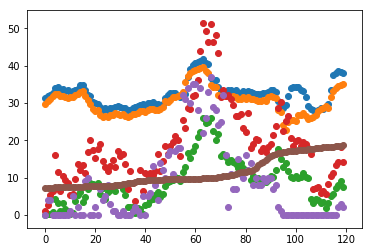

[ 1.  1.  3.]
[ 6.   5.1  6.   6.   5.7  5.6]
massive overfitting ?
 

#####


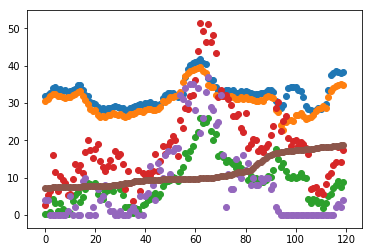

[ 1.  1.  3.]
[ 5.6  4.6  6.   6.   6.   6. ]
massive overfitting ?
 

#####


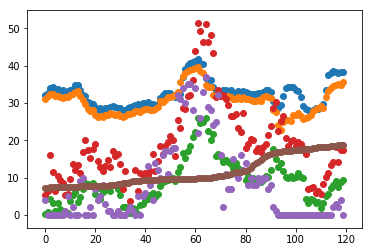

[ 1.  1.  3.]
[ 5.6  4.8  5.2  6.   5.6  6. ]
massive overfitting ?
 

#####


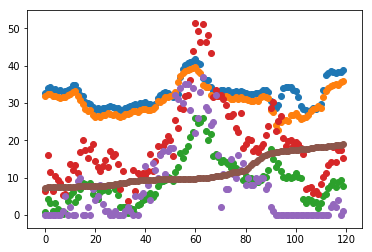

[ 1.  1.  3.]
[ 5.6  5.2  6.   5.3  5.   6. ]
massive overfitting ?
 

#####


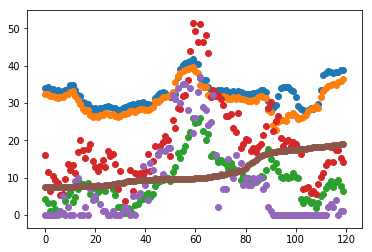

[ 0.  1.  2.]
[ 2.4  3.2  2.9  3.2  2.2  2.4]
massive overfitting ?
 

#####


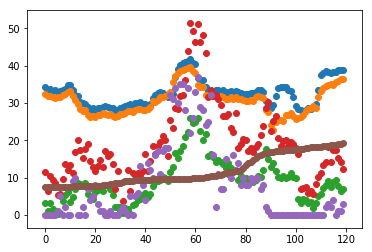

[ 0.  1.  2.]
[ 2.8  2.6  2.4  1.8  2.4  2. ]
massive overfitting ?
 

#####


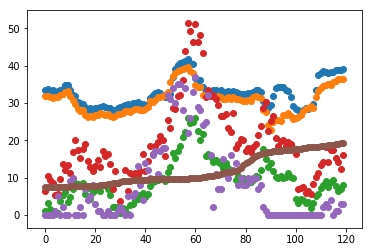

[ 0.  1.  2.]
[ 3.   2.   2.4  2.8  2.9  2. ]
massive overfitting ?


In [25]:
for t in range(10):
    time = 65 + t
    view_x(time, X_train)  # no danger
    print(X_train_meta[time])
    print('massive overfitting ?')

In [26]:
y_train.reshape(-1, 1), X_train_meta.shape

(array([[ 6.],
        [ 6.],
        [ 6.],
        ..., 
        [ 6.],
        [ 6.],
        [ 6.]]), (7898, 6))

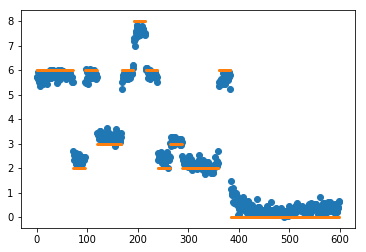

In [27]:
plt.scatter(range(600), X_train_meta[:600].mean(axis=1))
plt.scatter(range(600), y_train[:600], alpha=1, s=3)
# note overfitting on training set!

In [28]:
xy = np.concatenate([X_train_meta, y_train.reshape(-1, 1)], axis=1)
xy

array([[ 6.2,  6. ,  4.4, ...,  6. ,  6. ,  6. ],
       [ 5.8,  6. ,  5.2, ...,  6. ,  6. ,  6. ],
       [ 5.4,  5.6,  5.8, ...,  5.8,  6. ,  6. ],
       ..., 
       [ 6. ,  6. ,  4.4, ...,  6.2,  6. ,  6. ],
       [ 6. ,  6. ,  4.9, ...,  5.2,  6. ,  6. ],
       [ 6. ,  6. ,  4.6, ...,  5.5,  5.7,  6. ]])

In [34]:
X_test = X_multiseries[split:]
y_test = np.sum(y[['storm_slabs', 'wind_slab']][split:].values, axis=1) * y[split:].above

X_test_meta = np.empty((X_test.shape[0], X_test.shape[-1]))
for i in tqdm(range(X_test.shape[-1])):
    X_test_meta[:, i] = multisvc[i].predict(X_test[:, :, i])

X_test_meta.shape

100%|██████████| 6/6 [00:00<00:00, 173.76it/s]


(2000, 6)

In [35]:
zp = (zip(cols, X_test_meta.mean(axis=0)))
for item in zp:
    print(item)
y_test.mean()

('Temperature_m', 3.8192999999999975)
('Temperature_tl', 3.9767500000000009)
('Wind_Speed_Average_tl', 3.8003499999999941)
('Wind_Speed_Maximum_tl', 4.1027999999999993)
('precip', 4.0203808058529455)
('depth', 2.3191000000000073)


3.3304999999999998

 

#####


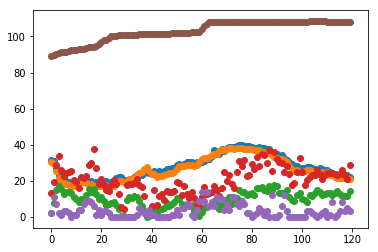

[ 1.  1.  3.]
4.78333333333
[ 5.3  5.2  4.6  4.   5.1  4.5]
 

#####


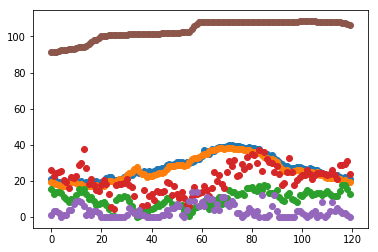

[ 1.  1.  3.]
4.48333333333
[ 5.4  3.6  3.7  4.6  5.1  4.5]
 

#####


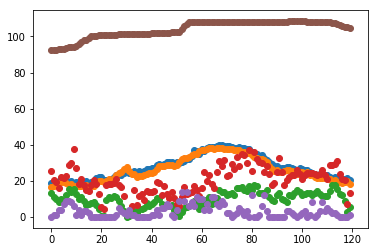

[ 1.  1.  3.]
4.8
[ 5.   4.2  5.2  4.7  5.2  4.5]
 

#####


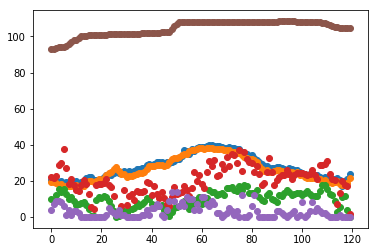

[ 1.  1.  3.]
4.63333333333
[ 5.   4.2  4.1  4.6  5.4  4.5]
 

#####


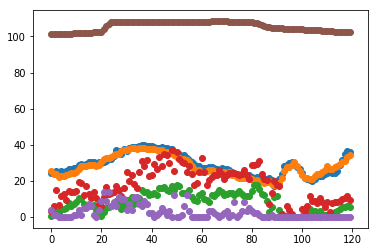

[ 1.  1.  3.]
3.23333333333
[ 3.5  2.8  3.8  2.4  3.9  3. ]
 

#####


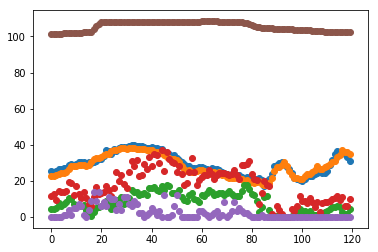

[ 1.  1.  3.]
2.48333333333
[ 3.1  2.8  2.3  3.3  3.4  0. ]
 

#####


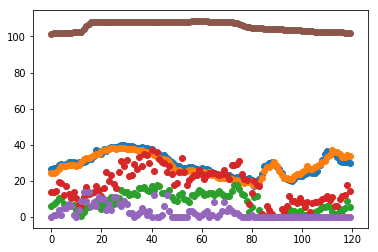

[ 1.  1.  3.]
2.83333333333
[ 3.4  2.8  3.3  4.3  3.2  0. ]
 

#####


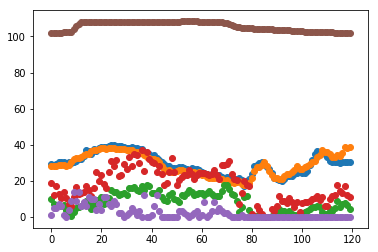

[ 1.  1.  3.]
3.2
[ 5.   5.   2.9  3.7  2.6  0. ]
 

#####


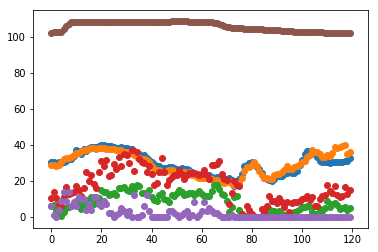

[ 1.  1.  3.]
2.91666666667
[ 3.8  4.6  3.1  3.5  2.5  0. ]
 

#####


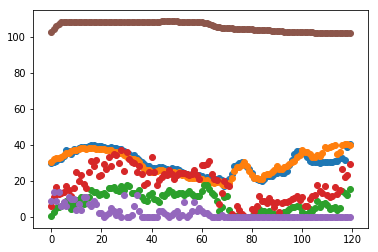

[ 1.  1.  3.]
2.56666666667
[ 4.3  1.5  3.1  3.5  2.8  0.2]
 

#####


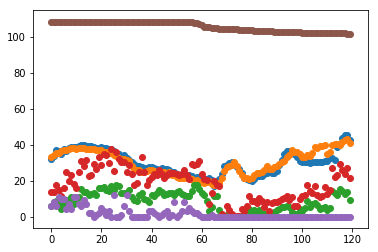

[ 1.  1.  3.]
2.76666666667
[ 4.2  1.   3.4  4.1  2.5  1.4]
 

#####


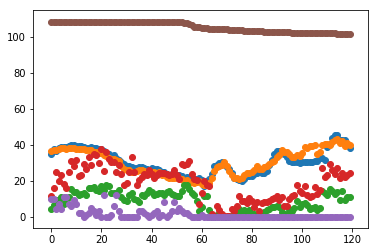

[ 1.  1.  3.]
2.86666666667
[ 3.8  1.2  4.7  4.4  1.7  1.4]
 

#####


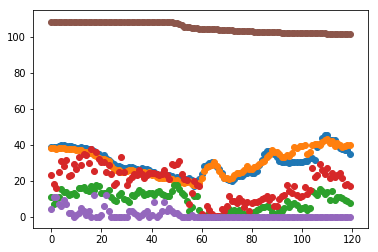

[ 1.  1.  3.]
3.18333333333
[ 3.4  1.4  3.8  5.8  3.3  1.4]
 

#####


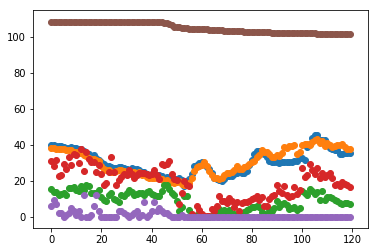

[ 1.  1.  3.]
3.11666666667
[ 3.2  2.   5.   4.7  1.8  2. ]
 

#####


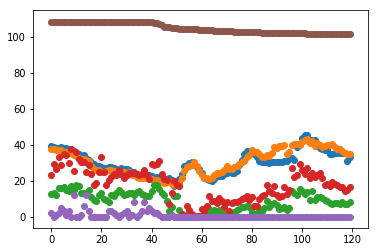

[ 1.  1.  3.]
3.13333333333
[ 1.5  3.2  4.   5.   2.1  3. ]
 

#####


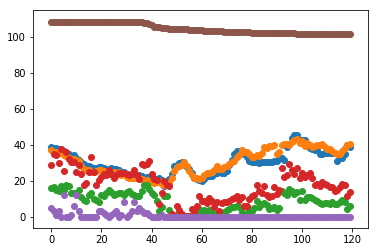

[ 1.  1.  3.]
4.0
[ 2.   2.2  6.6  6.4  1.7  5.1]
 

#####


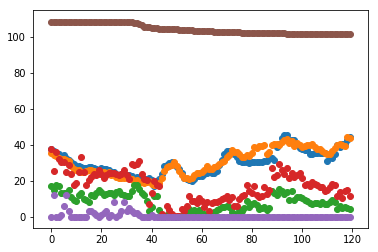

[ 1.  1.  3.]
3.76666666667
[ 3.   1.5  5.2  5.3  2.2  5.4]
 

#####


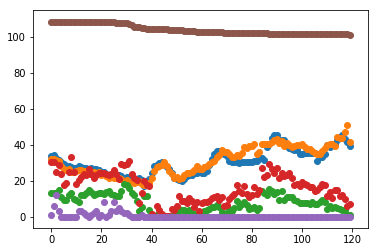

[ 1.  1.  3.]
3.21666666667
[ 2.   1.7  4.8  3.8  1.6  5.4]
 

#####


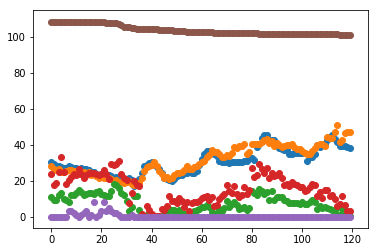

[ 0.  1.  2.]
2.85
[ 1.8  1.6  3.3  3.6  1.4  5.4]
 

#####


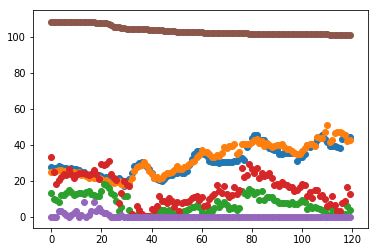

[ 0.  1.  2.]
2.96666666667
[ 1.4  1.5  4.1  4.4  1.4  5. ]
 

#####


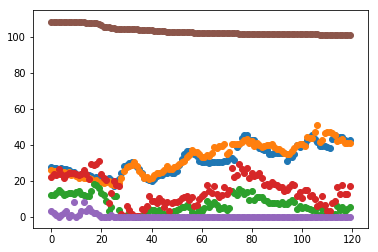

[ 0.  1.  2.]
2.85
[ 1.4  1.4  3.7  5.2  1.4  4. ]
 

#####


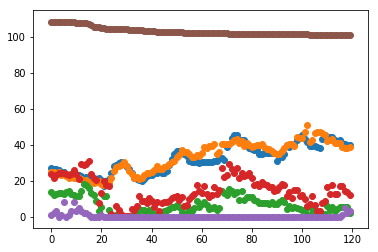

[ 0.  1.  2.]
2.88333333333
[ 1.4  1.4  2.9  5.4  3.4  2.8]
 

#####


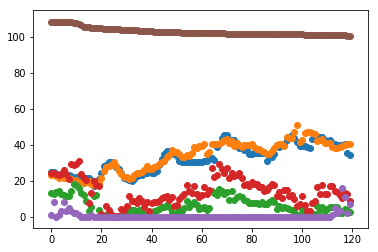

[ 0.  1.  2.]
3.43333333333
[ 3.9  2.2  2.8  4.9  3.6  3.2]
 

#####


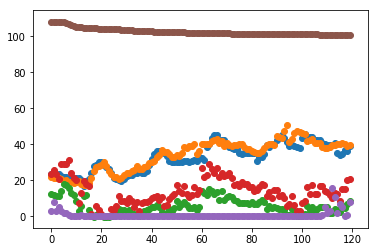

[ 0.  1.  2.]
3.56666666667
[ 4.2  1.4  4.1  4.7  3.8  3.2]
 

#####


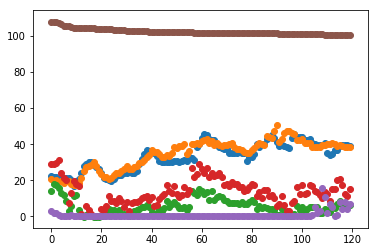

[ 1.  1.  3.]
3.45
[ 3.8  2.   2.8  4.2  4.8  3.1]
 

#####


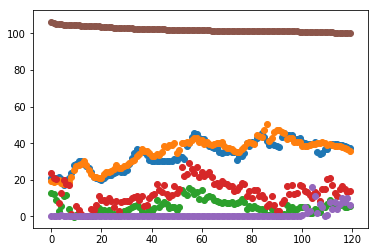

[ 1.  1.  3.]
3.45
[ 3.5  2.2  2.   3.9  6.   3.1]
 

#####


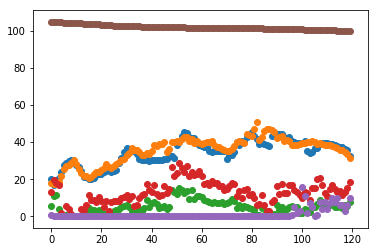

[ 1.  1.  3.]
3.03333333333
[ 1.5  2.8  3.4  4.   4.6  1.9]
 

#####


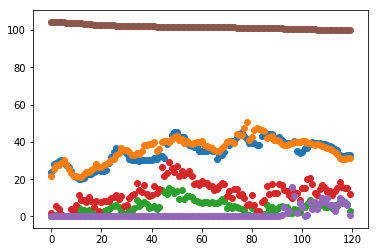

[ 1.  1.  3.]
2.9
[ 2.5  1.4  2.4  3.8  5.4  1.9]
 

#####


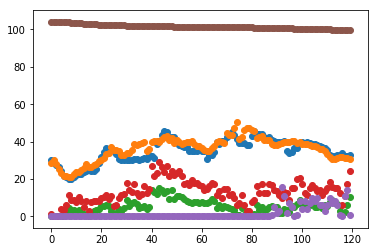

[ 1.  1.  3.]
3.21666666667
[ 3.3  3.4  3.2  3.9  3.7  1.8]
 

#####


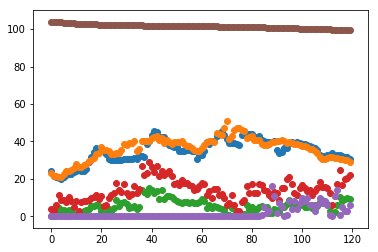

[ 1.  1.  3.]
3.8
[ 3.3  3.6  2.8  4.8  6.   2.3]


In [36]:
for t in range(30):
    time = t * 4
    view_x(time, X_test)  # no danger
    print(X_test_meta[time].mean())
    print(X_test_meta[time])

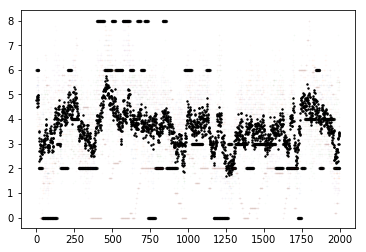

In [37]:
plt.scatter(range(len(y_test)), y_test, c='k', s=5, alpha=.2)
for s in range(X_test_meta.shape[-1]):
    plt.scatter(range(len(X_test_meta)), X_test_meta[:, s], s=.5, alpha=.02)
    
plt.scatter(range(len(X_test_meta)), X_test_meta.mean(axis=1), s=2, c='k')

plt.show()

In [ ]:
cols = ['Temperature_m', 'Temperature_tl', 'Wind_Speed_Average_tl',
        'Wind_Speed_Maximum_tl', 'precip', 'depth',]

mse = {}
for s in range(len(cols)):
    mse[cols[s]] = sum((X_test_meta[:, s] - y_test) ** 2) / len(y_test)
    
print(mse)